In [2]:
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path # 파일 경로를 객체처럼 다룰 수 있다. os.path.join을 더이상 안써도됨
from PIL import Image # 파이썬의 이미지를 처리할 수 있는 모듈
from collections import Counter 
import numpy as np
import cv2
from matplotlib.patches import Rectangle

In [3]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

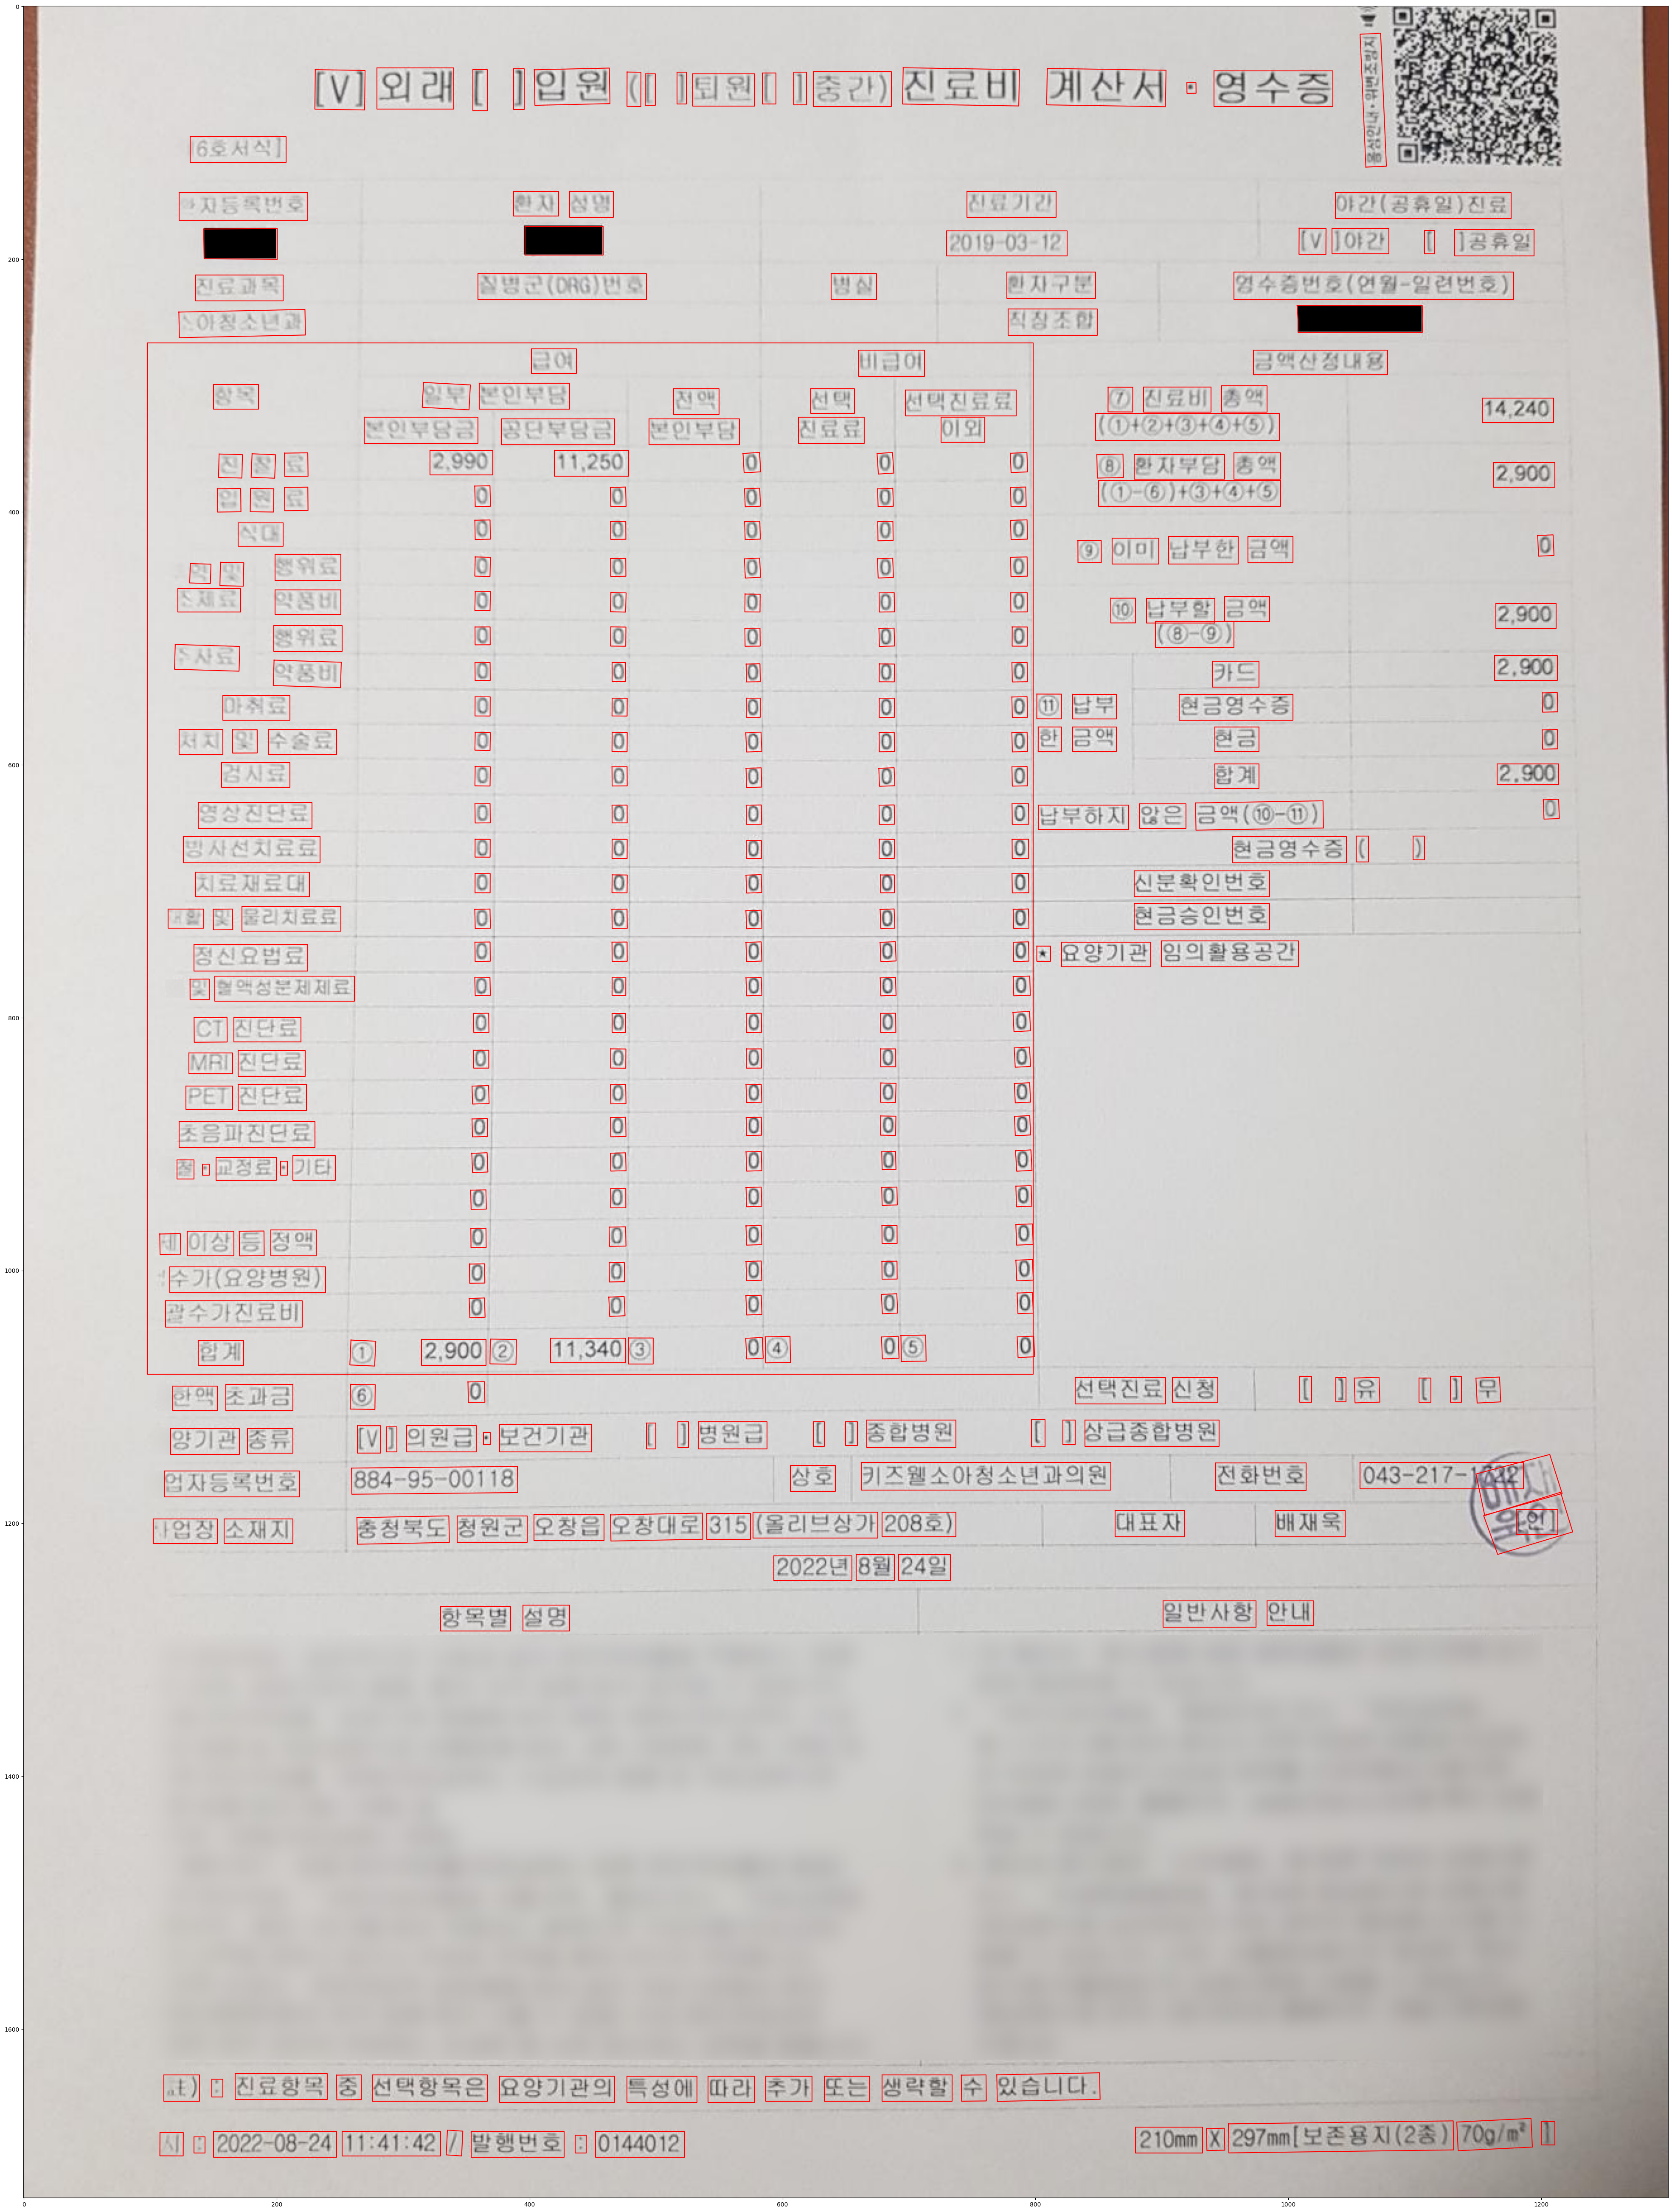

In [5]:
index = 9

data = read_json("/opt/ml/input/data/medical/ufo/train.json")
image_name = list(data['images'].keys())[index]
abs_path = f'/opt/ml/input/data/medical/img/train/{image_name}'

fig = plt.figure(figsize=(50, 100))
ax = fig.add_subplot()
with Path(abs_path) as object:
    img = Image.open(object)
    ax.imshow(img)

    for _, v in data['images'][image_name]['words'].items():
        points = v['points']
        points.append(points[0])
        xs, ys = zip(*points)
        plt.plot(xs, ys, color='red')